** cabocha インストール (ubuntu。うまくいった) **
一番参考になったのは
https://qiita.com/nezuq/items/f481f07fc0576b38e81d

- CRF++を普通にmakeしてインストールする
- CRF++を
https://y-uti.hatenablog.jp/?page=1473492021
に従って、ldconfigを行って認識させる
sudo ldconfig
- cabochaをビルド。この際に
https://qiita.com/nezuq/items/f481f07fc0576b38e81d
に従って、configureは以下のとおりにやる
./configure --with-mecab-config=`which mecab-config` --with-charset=UTF8 --with-posset=juman

- sudo -iしたあと、ソースのディレクトリ以下のに入り、
　　　/home/ユーザー名/anaconda3/bin/python ./setup.py install
　のようにする。(pythonを直に指定しないとrootが優先して使うシステムのpythonを呼びに行ってしまう）


** CaboChaインストール (windows.まだうまくいっていない)**

- 32bit版のpythonのcondaenvを作成。activateしたときにmecabとcabochaのbinがpathに追加されるように設定
- 32bit版のMecabをインストール（必ずCaboChaインストール前に上記のpathを通すことを含めてやる）
- CaboChaのexeからインストール（32bitのcondaenvをactivateしたうえで行う）
- 公式バインディングは評判も悪いし、インストールがそもそもできないのでbindingを使う（？）
VS community version を入れればよい？==>うまくいかず
http://isiz.hateblo.jp/entry/2015/08/22/Python%E3%81%A7Unable_to_find_vcvarsall.bat%E3%81%A8%E8%A8%80%E3%82%8F%E3%82%8C%E3%82%8B%E9%9A%9B%E3%81%AE%E3%81%BE%E3%81%A8%E3%82%81

Visual c++　2015 build tool?
https://blog.ionelmc.ro/2014/12/21/compiling-python-extensions-on-windows/




https://github.com/kenkov/cabocha

https://musaprg.hatenablog.com/entry/2018/02/09/005510


https://teratail.com/questions/80487


以下検証中:

https://qiita.com/mima_ita/items/161cd869648edb30627b

https://teratail.com/questions/80487


https://hayataka2049.hatenablog.jp/entry/2018/03/23/075140


In [1]:
import CaboCha


In [2]:
import codecs

** 基本的な使い方 **

https://qiita.com/nezuq/items/f481f07fc0576b38e81d

In [3]:
c = CaboCha.Parser()

In [4]:
CaboCha.Parser.parse?


In [5]:
tmp2 = (c.parse(u'吾輩は猫である。名前は、まだない。'))

In [6]:
tmp2 = c.parse(u'別段くるにも及ばんさと、主人は手紙に返事をする。')

In [7]:
print(tmp2.toString(CaboCha.FORMAT_LATTICE))


* 0 1D 1/2 0.272878
別段	副詞,助詞類接続,*,*,*,*,別段,ベツダン,ベツダン
くる	動詞,自立,*,*,カ変・クル,基本形,くる,クル,クル
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
* 1 3D 5/5 -1.092561
も	助詞,係助詞,*,*,*,*,も,モ,モ
及ば	動詞,自立,*,*,五段・バ行,未然形,及ぶ,オヨバ,オヨバ
ん	助動詞,*,*,*,不変化型,基本形,ん,ン,ン
さ	助詞,終助詞,*,*,*,*,さ,サ,サ
と	助詞,格助詞,引用,*,*,*,と,ト,ト
、	記号,読点,*,*,*,*,、,、,、
* 2 3D 2/3 -1.092561
主人	名詞,一般,*,*,*,*,主人,シュジン,シュジン
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
手紙	名詞,一般,*,*,*,*,手紙,テガミ,テガミ
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
* 3 -1D 3/3 0.000000
返事	名詞,サ変接続,*,*,*,*,返事,ヘンジ,ヘンジ
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
する	動詞,自立,*,*,サ変・スル,基本形,する,スル,スル
。	記号,句点,*,*,*,*,。,。,。
EOS



In [7]:
print(tmp2.toString(CaboCha.FORMAT_XML))

<sentence>
 <chunk id="0" link="1" rel="D" score="0.272878" head="1" func="2">
  <tok id="0" feature="副詞,助詞類接続,*,*,*,*,別段,ベツダン,ベツダン">別段</tok>
  <tok id="1" feature="動詞,自立,*,*,カ変・クル,基本形,くる,クル,クル">くる</tok>
  <tok id="2" feature="助詞,格助詞,一般,*,*,*,に,ニ,ニ">に</tok>
 </chunk>
 <chunk id="1" link="3" rel="D" score="-1.092561" head="8" func="8">
  <tok id="3" feature="助詞,係助詞,*,*,*,*,も,モ,モ">も</tok>
  <tok id="4" feature="動詞,自立,*,*,五段・バ行,未然形,及ぶ,オヨバ,オヨバ">及ば</tok>
  <tok id="5" feature="助動詞,*,*,*,不変化型,基本形,ん,ン,ン">ん</tok>
  <tok id="6" feature="助詞,終助詞,*,*,*,*,さ,サ,サ">さ</tok>
  <tok id="7" feature="助詞,格助詞,引用,*,*,*,と,ト,ト">と</tok>
  <tok id="8" feature="記号,読点,*,*,*,*,、,、,、">、</tok>
 </chunk>
 <chunk id="2" link="3" rel="D" score="-1.092561" head="11" func="12">
  <tok id="9" feature="名詞,一般,*,*,*,*,主人,シュジン,シュジン">主人</tok>
  <tok id="10" feature="助詞,係助詞,*,*,*,*,は,ハ,ワ">は</tok>
  <tok id="11" feature="名詞,一般,*,*,*,*,手紙,テガミ,テガミ">手紙</tok>
  <tok id="12" feature="助詞,格助詞,一般,*,*,*,に,ニ,ニ">に</tok>
 </chunk>
 <chunk id=

In [6]:
print(c.parseToString(u'吾輩は猫である。名前は、まだない'))

    吾輩は-D    
  猫である。---D
      名前は、-D
        まだない
EOS



In [7]:
tmp = c.parse(u'吾輩は猫である。名前はまだない。')

In [8]:
c.parseToString?

** 0. 形態素を表すクラスMorphを実装せよ．**

このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，CaboChaの解析結果（neko.txt.cabocha）を読み込み，各文をMorphオブジェクトのリストとして表現し，3文目の形態素列を表示せよ 

In [9]:
fname_parsed = '/home/toshinao/PycharmProjects/keras_sandbox/nlp100data/neko.txt.cabocha'
neko_file_dir = '/home/toshinao/PycharmProjects/keras_sandbox/nlp100data/neko.txt'

In [10]:
with codecs.open(neko_file_dir , "r" , 'utf-8') as rf ,\
    codecs.open(fname_parsed , 'w' , 'utf-8') as wf:
    c = CaboCha.Parser()
    for l in rf:
        wf.write(c.parse(l).toString(CaboCha.FORMAT_LATTICE))

In [11]:
class Morph:
    def __init__(self , surface ,base , pos , pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1
    def __str__(self):
        return ('surface[{}]\tbase[{}]\tpos[{}]\tpos1[{}]'.format(self.surface, self.base , self.pos , self.pos1))

In [12]:
def create_llmorph():
    morphs = []
    with codecs.open(fname_parsed, 'r' , 'utf-8') as f0:
        for x in f0:
            run_split = x.replace('\t',',').split(',')
            if x == "EOS\n":
                yield morphs
                morphs = []
            elif x[0] == '*' or x[0] == '\u3000':
                continue
            else:
                
                if len(run_split) > 7 :
                    run_map = Morph(run_split[0],
                                    run_split[7],
                                    run_split[1] ,
                                    run_split[2])

                    morphs.append(run_map)
                #print(x.replace('\t'))

In [13]:
llmorph = []
for x in create_llmorph():
    llmorph.append(x)

In [14]:
for x in llmorph[6]:
    print(x)

surface[何]	base[何]	pos[名詞]	pos1[代名詞]
surface[でも]	base[でも]	pos[助詞]	pos1[副助詞]
surface[薄暗い]	base[薄暗い]	pos[形容詞]	pos1[自立]
surface[じめじめ]	base[じめじめ]	pos[副詞]	pos1[一般]
surface[し]	base[する]	pos[動詞]	pos1[自立]
surface[た]	base[た]	pos[助動詞]	pos1[*]
surface[所]	base[所]	pos[名詞]	pos1[非自立]
surface[で]	base[で]	pos[助詞]	pos1[格助詞]
surface[ニャーニャー]	base[*
]	pos[名詞]	pos1[一般]
surface[泣い]	base[泣く]	pos[動詞]	pos1[自立]
surface[て]	base[て]	pos[助詞]	pos1[接続助詞]
surface[いた事]	base[いた事]	pos[名詞]	pos1[一般]
surface[だけ]	base[だけ]	pos[助詞]	pos1[副助詞]
surface[は]	base[は]	pos[助詞]	pos1[係助詞]
surface[記憶]	base[記憶]	pos[名詞]	pos1[サ変接続]
surface[し]	base[する]	pos[動詞]	pos1[自立]
surface[て]	base[て]	pos[助詞]	pos1[接続助詞]
surface[いる]	base[いる]	pos[動詞]	pos1[非自立]
surface[。]	base[。]	pos[記号]	pos1[句点]


**** sandbox ****

In [24]:
with codecs.open(fname_parsed , 'r' , 'utf-8') as rf:
    tmp = [x for x in rf]

In [33]:
tmp[5][0]

'\u3000'

In [10]:

tmptmp = Morph("a","A","b","B")

In [18]:
print(tmptmp)

surface[a]	base[A]	pos[b]	pos1[B]


以下は問題の趣旨に合っていない

In [81]:
morphs = []
with codecs.open(fname_parsed, 'r' , 'utf-8') as f0:
    for x in f0:
        run_split = x.replace('\t',',').split(',')
        if len(run_split) > 7:
            run_map = Morph(run_split[0],
                            run_split[7],
                            run_split[1] ,
                            run_split[2])

            morphs.append(run_map)
        #print(x.replace('\t'))

In [116]:
with codecs.open(fname_parsed , 'r' , 'utf-8') as rf:
    tmp = [x for x in rf][0:100]

In [42]:
[print(x) for i , x in enumerate(tmp) if i < 100]


* 0 -1D 0/0 0.000000

一	名詞,数,*,*,*,*,一,イチ,イチ

EOS

EOS

* 0 1D 1/2 0.000000

　	記号,空白,*,*,*,*,　,　,　

吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ

は	助詞,係助詞,*,*,*,*,は,ハ,ワ

* 1 -1D 3/3 0.000000

猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ

で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ

ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル

。	記号,句点,*,*,*,*,。,。,。

EOS

* 0 1D 0/1 0.000000

名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ

は	助詞,係助詞,*,*,*,*,は,ハ,ワ

* 1 -1D 2/2 0.000000

まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ

無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ

。	記号,句点,*,*,*,*,。,。,。

EOS

EOS

* 0 2D 1/2 -0.455066

　	記号,空白,*,*,*,*,　,　,　

どこ	名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ

で	助詞,格助詞,一般,*,*,*,で,デ,デ

* 1 2D 4/5 -0.455066

生れ	動詞,自立,*,*,一段,連用形,生れる,ウマレ,ウマレ

た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ

か	助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ

とんと	副詞,一般,*,*,*,*,とんと,トント,トント

見当	名詞,サ変接続,*,*,*,*,見当,ケントウ,ケントー

が	助詞,格助詞,一般,*,*,*,が,ガ,ガ

* 2 -1D 2/2 0.000000

つか	動詞,自立,*,*,五段・カ行イ音便,未然形,つく,ツカ,ツカ

ぬ	助動詞,*,*,*,特殊・ヌ,基本形,ぬ,ヌ,ヌ

。	記号,句点,*,*,*,*,。,。,。

EOS

* 0 1D 0/1 0.296355

何	名詞,代名詞,一般,*,*,*,何,ナニ,ナニ

でも	助詞,副助詞,*,*,*,*,でも,デモ,デモ

* 1 2D 3/3 0.09

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

#### 40に加えて，文節を表すクラスChunkを実装せよ．
このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストのCaboChaの解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，8文目の文節の文字列と係り先を表示せよ．第5章の残りの問題では，ここで作ったプログラムを活用せよ

In [15]:
class Chunk:
    def __init__(self):
        self.morphs = []
        self.dst =  -1
        self.srcs = []
    def surface(self):
        surface = ""
        for x in self.morphs:
            surface +=  x.surface
        return surface
    def surface_short(self):
        surface = ""
        for x in self.morphs:
            if x.pos != "記号":
                surface +=  x.surface
        return surface
        
    def __str__(self):
        #surface = ""
        #for x in self.morphs:
        #    surface +=  x.surface
        return "{}\t src{}\t dst[{}]".format(self.surface(), self.srcs , self.dst)
        

In [16]:
import re

In [24]:
%%bash
head -20 /home/toshinao/PycharmProjects/keras_sandbox/nlp100data/neko.txt.cabocha

* 0 -1D 0/0 0.000000
一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
* 0 1D 1/2 0.000000
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
* 1 -1D 3/3 0.000000
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
EOS
* 0 1D 0/1 0.000000
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
* 1 -1D 2/2 0.000000
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ


In [18]:
def create_chunks():

    with codecs.open(fname_parsed, 'r' , 'utf-8') as f0:
        chunks = dict()
        for x in f0:
        
            if x == "EOS\n":
                yield chunks
                chunks = dict()
            elif x[0] == '*':    
                x_split = x.split(' ')
                x_idx = int(x_split[1])
                y_idx = int(re.search(r'^(.+)D' , x_split[2]).group(1))
                if x_idx not in chunks:
                    chunks[x_idx] = Chunk()
                
                chunks[x_idx].dst = y_idx
                if y_idx != -1:
                    if y_idx not in chunks:
                        chunks[y_idx] = Chunk()

                    chunks[y_idx].srcs.append(x_idx)

                
            else:
                run_split = x.replace('\t',',').split(',')
                #if len(run_split) > 7  and (run_split[2] != '空白'):
                if len(run_split) > 7  and (run_split[0] != '\u3000'):
                    run_map = Morph(run_split[0],
                                    run_split[7],
                                    run_split[1] ,
                                    run_split[2])

                    chunks[x_idx].morphs.append(run_map)
                #print(x.replace('\t'))

参考URLにある「*?」は最短マッチ

In [19]:
lchunk = []
for x in create_chunks():
    lchunk.append(x)

In [22]:
lchunk[0][0]

In [153]:
for x in lchunk[3]:
    print(x)
    

0
1


In [159]:
[x for x in lchunk[3]]

[0, 1]

In [167]:
for x in lchunk[7]:
    print(x, lchunk[7][x])    

0 吾輩は	 src[]	 dst[5]
1 ここで	 src[]	 dst[2]
2 始めて	 src[1]	 dst[5]
3 人間という	 src[]	 dst[5]
4 ものを	 src[]	 dst[5]
5 見た。	 src[0, 2, 3, 4]	 dst[-1]


In [282]:
tmptmp = lchunk[3].values()

In [283]:
print(lchunk[3][-1])

	 src[-1] dst[['1']]


In [284]:
print(list(tmptmp)[1])


まだ無い。	 src[-1] dst[[]]


In [275]:
print(list(tmptmp)[0])

['名', '前', 'は']	 src[1] dst[[]]


In [162]:
int(re.search(r'^(.+)D' , tmp[0].split(' ')[2]).group(1))

-1

#### 係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [177]:
lpair = []
for run_dict in lchunk:
    for x in run_dict:
        run_chunk = run_dict[x]
        if run_chunk.dst != -1:
            lpair.append("{}\t{}".format(run_chunk.surface_short() , run_dict[run_chunk.dst].surface_short()))
   

In [178]:
len(lpair)

53155

In [179]:
print(lpair[1])

名前は	まだ無い


##### sandbox

In [169]:
i = 7
for x in lchunk[i]:
    run_chunk = lchunk[i][x]
    if run_chunk.dst != -1:
        print("{}\t{}".format(run_chunk.surface_short() , lchunk[i][run_chunk.dst].surface_short()))
   

吾輩は	見た
ここで	始めて
始めて	見た
人間という	見た
ものを	見た


In [176]:
type(lchunk[i])

dict

#### 名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

https://stackoverflow.com/questions/1790520/how-to-apply-a-logical-operator-to-all-elements-in-a-python-list

In [191]:
lpair43 = []
for run_dict in lchunk:
    for x in run_dict:
        run_chunk = run_dict[x]
        if run_chunk.dst != -1:    
            run_dst_chunk = run_dict[run_chunk.dst]
            is_contain_noun = any([m.pos == "名詞" for m in run_chunk.morphs])
            is_contain_verb = any([m.pos == "動詞" for m in run_dst_chunk.morphs])
            if is_contain_noun and is_contain_verb:
                lpair43.append("{}\t{}".format(run_chunk.surface_short() , run_dst_chunk.surface_short()))
    

In [330]:
[print(x) for  i , x in enumerate(lpair43) if i < 40]

どこで	つかぬ
生れたかとんと見当が	つかぬ
何でも	薄暗いじめじめした
所で	ニャーニャー泣いて
ニャーニャー泣いて	記憶して
いた事だけは	記憶して
記憶して	いる
吾輩は	見た
ここで	始めて
人間という	見た
ものを	見た
あとで	聞くと
書生というのは時々我々を	捕えて
考もなかったから	別段恐しいとも思わなかった
彼の掌に	載せられて
スーと	持ち上げられた
感じが	あったばかりである
掌の上で	見たのが
書生の顔を	見たのが
人間という	見
ものの	見
ものだと	思った
感じが	いる
今でも	いる
第一毛をもって	装飾されべき
はずの顔が	つるつるして
顔の真中が	あまりに突起して
あまりに突起して	いる
中から	吹く
時々ぷうぷうと煙を	吹く
どうも咽せぽくて	実に弱った
これが	頃知った
人間の	飲む煙草という
飲む煙草という	頃知った
ものである事は	頃知った
書生の掌の裏で	坐って
しばらくはよい心持に	坐って
速力で	運転し始めた
書生が	動くのか自分だけが
動くのか自分だけが	動くのか分らないが


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

##### sandbox

In [188]:
i = 7
run_dict = lchunk[i]
for x in run_dict:
    run_chunk = run_dict[x]
    if run_chunk.dst != -1:    
        run_dst_chunk = run_dict[run_chunk.dst]
        is_contain_noun = any([m.pos == "名詞" for m in run_chunk.morphs])
        is_contain_verb = any([m.pos == "動詞" for m in run_dst_chunk.morphs])
        if is_contain_noun and is_contain_verb:
            print("{}\t{}".format(run_chunk.surface_short() , run_dst_chunk.surface_short()))
   

吾輩は	見た
ここで	始めて
人間という	見た
ものを	見た


In [197]:
for m in run_chunk.morphs:
    print(m.pos)

形容詞
形容詞
記号


In [186]:
any([m.pos == "動詞" for m in run_chunk.morphs])

True

#### 与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，係り受け木をDOT言語に変換し，Graphvizを用いるとよい．また，Pythonから有向グラフを直接的に可視化するには，pydotを使うとよい

In [23]:
from IPython.display import Image

In [24]:
import pydot_ng as pydot

In [25]:
g = pydot.Dot(graph_type ="digraph")

In [26]:
i = 5

run_dict = lchunk[i]
for x in run_dict:
    run_chunk = run_dict[x]
    g.add_node(pydot.Node(x , label = run_chunk.surface_short()))
    if run_chunk.dst != -1:    
        run_dst_chunk = run_dict[run_chunk.dst]     
        g.add_node(pydot.Node(run_chunk.dst , label = run_dst_chunk.surface_short()))
        g.add_edge(pydot.Edge(x , run_chunk.dst))
        is_contain_noun = any([m.pos == "名詞" for m in run_chunk.morphs])
        is_contain_verb = any([m.pos == "動詞" for m in run_dst_chunk.morphs])
        if is_contain_noun and is_contain_verb:
            print("{}\t{}".format(run_chunk.surface_short() , run_dst_chunk.surface_short()))

どこで	つかぬ
生れたかとんと見当が	つかぬ


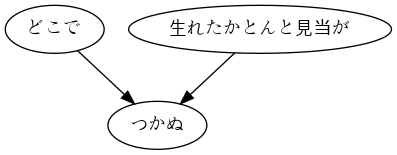

In [27]:
Image(g.create_png())

##### sandbox

In [237]:
run_sentence = "何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。"

#### 動詞の格パターンの抽出
今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ．

- 動詞を含む文節において，最左の動詞の基本形を述語とする
- 述語に係る助詞を格とする
- 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる

「吾輩はここで始めて人間というものを見た」という例文（neko.txt.cabochaの8文目）を考える．この文は「始める」と「見る」の２つの動詞を含み，「始める」に係る文節は「ここで」，「見る」に係る文節は「吾輩は」と「ものを」と解析された場合は，次のような出力になるはずである．

```bash
始める  で
見る    は を
```

このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．
- コーパス中で頻出する述語と格パターンの組み合わせ
- 「する」「見る」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）

In [302]:
result_file = "results/result45.txt"

In [307]:
run_list45 = []
with codecs.open(result_file , "w" , "utf-8") as wf:
    for run_dict in lchunk:
        for x in run_dict:
            run_chunk = run_dict[x]    
            verbs_base = [m.base for m in run_chunk.morphs if m.pos == "動詞"]
            if len(verbs_base) > 0:
                run_verb = verbs_base[0]           
                run_srcs = run_chunk.srcs
                cases_text = ""
                for s in run_srcs:
                    cases = [m.surface for m in run_dict[s].morphs if m.pos == "助詞"]
                    cases_text += " " + " ".join(cases)

                run_line = "{}\t{}".format(run_verb , cases_text)
                #print(run_line)
                run_list45.append(run_line)
                wf.write(run_line + "\n")

In [304]:
len(run_list45)

26027

ソートして重複除去して、その件数でソート

In [308]:
%%sh
sort results/result45.txt| uniq --count | sort --numeric-sort --reverse > "results/result45_all.txt"

「する」のみ

In [311]:
%%sh
grep "^する\s" results/result45.txt | sort | uniq --count | sort --numeric-sort --reverse > results/result45_suru.txt

In [312]:
%%bash
less results/result45_suru.txt

    832 する	 で
    575 する	
    517 する	 の が
    257 する	 は は に
    131 する	 
    101 する	 の の が で
     92 する	  を
     80 する	 より も
     72 する	 でも
     42 する	 から が を
     39 する	 は な と は を
     39 する	  の が
     36 する	 て だけ は
     35 する	 が って
     33 する	 が 
     29 する	  は を に
     24 する	 たって に
     18 する	 ば とか の を
     17 する	 は  が
     16 する	 ほど の は に
     14 する	 くらい
     13 する	 よ か 
     12 する	 の を んで を
     12 する	  
     11 する	 ばかり に を
     11 する	 て は まで
     11 する	 の が の で の に
     10 する	 で は から の を
      9 する	  から
      8 する	 は として
      7 する	 をもって
      7 する	 て は て から が
      7 する	  が の を て
      6 する	 から とか を
      6 する	 て ながら を
      6 する	 の など は て は
      6 する	 や の ばかり に
      6 する	 と に ばかり
      6 する	 ね と は て の を が
      6 する	 と  が を
      6 する	  まで に
      5 する	 から 
      5 する	 は によって
      5 する	 は とか とか と
      4 する	 まで の は て を
      4 する	 は の に まで
      4 する	 も ば は に のに
      4 する	   の を
      3 する	 から から の で
      3 する	 って から
      3 する	 から  を
      3 する	 は として に が
      3 する	 ん から

##### sandbox

In [290]:
%%bash
ls

artisticFilter.py
bach_deep_learning.ipynb
bach_dl2.ipynb
basicImageManipulation.py
comp_stream1.png
cp.png
data
deep_jazz_all_in_one.py
facialKeypointsDetection.py
ggiraph_sandbox.ipynb
imdb_classification_sandbox.py
itertools.py
m.png
mschart_sandbox.ipynb
music21_sandbox.py
music21_sandbox_python3.ipynb
natural_language_cnn.ipynb
neutralStyleTransfer201610.py
nlp100_30.ipynb
nlp100_40.ipynb
nlp100data
nlp100.ipynb
pycharm_jupyter_tips.ipynb
random_music_instruments.ipynb
reading_deepjazz_python3.ipynb
results
result.txt
r_jupyter_notebook_sandbox.ipynb
r_vs_python.ipynb
selenium_history.py
selenium_play.py
solo_stream0.png
style_refs
theano_logistic_regression.py
theano_sandbox.ipynb
theanoSandbox.py
transferLearning_0_visualization.py
transferLearning.py


In [313]:
%%bash
git commit -a -m "from notebook"

[master e9d3138] from notebook
 1 file changed, 284 insertions(+), 18 deletions(-)


In [281]:
run_list45 = []
for x in run_dict:
    run_chunk = run_dict[x]    
    verbs_base = [m.base for m in run_chunk.morphs if m.pos == "動詞"]
    if len(verbs_base) > 0:
        run_verb = verbs_base[0]           
        run_srcs = run_chunk.srcs
        cases_text = ""
        for s in run_srcs:
            cases = [m.surface for m in run_dict[s].morphs if m.pos == "助詞"]
            cases_text += " " + " ".join(cases)
   
        run_line = "{}\t{}".format(run_verb , cases_text)
        print(run_line)
        run_list45.append(run_line)
    
 

始める	 で
見る	 は て という を


In [270]:
run_dict = lchunk[7]

In [275]:
run_dict[5].srcs

[0, 2, 3, 4]

In [259]:
run_dict45 = dict()
for run_dict in lchunk:
    for x in run_dict:
        run_chunk = run_dict[x]
        if run_chunk.dst != -1:    
            run_dst_chunk = run_dict[run_chunk.dst]  

            #is_contain_verb = any([m.pos == "動詞" for m in run_dst_chunk.morphs])
            verbs_base = [m.base for m in run_dst_chunk.morphs if m.pos == "動詞"]
            cases = [m.surface for m in run_chunk.morphs if m.pos == "助詞"]

            if len(verbs_base) > 0:
                run_verb = verbs_base[0]
                if run_verb not in run_dict45:
                    run_dict45[run_verb] = " ".join(cases)
                else:
                    run_dict45[run_verb] += " " + " ".join(cases)

                #print(cases)

In [263]:
len(list(run_dict45.keys()))

2074

In [256]:
i = 7

run_dict = lchunk[i]
run_dict45 = dict()
for x in run_dict:
    run_chunk = run_dict[x]
    if run_chunk.dst != -1:    
        run_dst_chunk = run_dict[run_chunk.dst]  
        
        #is_contain_verb = any([m.pos == "動詞" for m in run_dst_chunk.morphs])
        verbs_base = [m.base for m in run_dst_chunk.morphs if m.pos == "動詞"]
        cases = [m.surface for m in run_chunk.morphs if m.pos == "助詞"]
        
        if len(verbs_base) > 0:
            run_verb = verbs_base[0]
            if run_verb not in run_dict45:
                run_dict45[run_verb] = " ".join(cases)
            else:
                run_dict45[run_verb] += " " + " ".join(cases)
            
            #print(cases)

['は']
['で']
['て']
['という']
['を']


In [314]:
run_dict45

{}

In [315]:
run_dict45.keys()

dict_keys([])

####  動詞の格フレーム情報の抽出
45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．45の仕様に加えて，以下の仕様を満たすようにせよ．

- 項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）
- 述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる
「吾輩はここで始めて人間というものを見た」という例文（neko.txt.cabochaの8文目）を考える． この文は「始める」と「見る」の２つの動詞を含み，「始める」に係る文節は「ここで」，「見る」に係る文節は「吾輩は」と「ものを」と解析された場合は，次のような出力になるはずである．

````
始める  で      ここで
見る    は を   吾輩は ものを
````

In [26]:
result_file = "results/result46.txt"

In [27]:
run_list46 = []
with codecs.open(result_file , "w" , "utf-8") as wf:
    for run_dict in lchunk:
        for x in run_dict:
            run_chunk = run_dict[x]    
            verbs_base = [m.base for m in run_chunk.morphs if m.pos == "動詞"]
            if len(verbs_base) > 0:
                run_verb = verbs_base[0]           
                run_srcs = run_chunk.srcs
                cases_text = ""
                ko = ""
                for s in run_srcs:
                    cases = [m.surface for m in run_dict[s].morphs if m.pos == "助詞"]
                    cases_text += " " + " ".join(cases)
                    ko += " " + run_dict[s].surface()

                run_line = "{}\t{}\t{}".format(run_verb , cases_text , ko)
                #run_line = "{}\t{}".format(run_verb , cases_text)
                #print(run_line)
                run_list46.append(run_line)
                wf.write(run_line + "\n")

In [28]:
print(run_list46[1])

つく	 で か が	 どこで 生れたかとんと見当が


##### sandbox

In [34]:
run_dict = lchunk[7]
for x in run_dict:
    run_chunk = run_dict[x]    
    verbs_base = [m.base for m in run_chunk.morphs if m.pos == "動詞"]
    if len(verbs_base) > 0:
        run_verb = verbs_base[0]           
        run_srcs = run_chunk.srcs
        ko = ""
        for s in run_srcs:
            cases = [m.surface for m in run_dict[s].morphs if m.pos == "助詞"]
            cases_text += " " + " ".join(cases)
            ko += " " + run_dict[s].surface()

        run_line = "{}\t{}\t{}".format(run_verb , cases_text , ko)
        print(run_line)
        #run_list46.append(run_line)
        #wf.write(run_line + "\n")

始める	 で か が でも で て だけ は て で は て という を で という は を て て  も から の に て と   が の で て の を という の と が でも て をもって の が  の が て  から を て の が という は    の の で は に て で が か だけ が か が が が と て と と が て から が まで は て が は の やら が て と  が も の さえ を て まで の と を でも と て は の から に の へ で を と に が の に て と て という て に が  て か と  と に て が の を と が て が が に て て も が の  で まで と を て に を て に て の で へ へ  と て に   が て は は に の と は の は に の を まで が の に て へ は  ものの に  は が て という で の が  へ と て から は の に て で は の の を  に を で を は で へ と から を て を に  て  に は が は の を て へ  は て は て を は でも を て と に は に の を んで を て て から の が が に の が と ながら て は を て の へ て が て も て も へ て て と を ながら の を て が へ て といった へ て は を と に を へ と  は を に から に  て と て も か の て は の が は に の を て を が は て が て の に を て は で の が を て を て に を を で を で を と を の へ が は ながら が と と に て て  に でも に に とか を  ほど は が て が へ へ て も て に か は に まで さえ て から を て は の に を を が は の の に が を は に は から は へ に て の の へ  は で に という は と で に と が へ て へ を て  に か が の が を は でも が に は が  が が と て でも でも で の の は を て から  て は で は と て を ば と を に が  に を に たり へ を たり は たり の へ の

In [322]:
run_dict[s].surface()

'ものを'

#### 機能動詞構文のマイニング
動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．

- 「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする
- 述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる
- 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
- 述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）

例えば「別段くるにも及ばんさと、主人は手紙に返事をする。」という文から，以下の出力が得られるはずである．

```
返事をする      と に は        及ばんさと 手紙に 主人は
```

このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．

コーパス中で頻出する述語（サ変接続名詞+を+動詞）
コーパス中で頻出する述語と助詞パターン

948文目が例示されている文章：

In [29]:
with codecs.open(neko_file_dir , "r" , 'utf-8') as rf:
    [print(i , x) for i ,x in enumerate(rf) if x.find("返事をする") > -1]

462 「なに二人とも去る所の令嬢ですよ、御存じの方じゃありません」と余所余所しい返事をする。

505 「厭きっぽいのじゃない薬が利かんのだ」「それだってせんだってじゅうは大変によく利くよく利くとおっしゃって毎日毎日上ったじゃありませんか」「こないだうちは利いたのだよ、この頃は利かないのだよ」と対句のような返事をする。

948 　別段くるにも及ばんさと、主人は手紙に返事をする。

1046 　下女は自分より猫の方が上等な動物であるような返事をする。

1266 さっきから伺っていると○○子さんと云うのが二返ばかり聞えるようだが、もし差支えがなければ承わりたいね、君」と主人を顧みると、主人も「うむ」と生返事をする。

1605 油断のならない世の中だからね」と飄然とふわふわした返事をする。

1666 主人もやむを得ず「うむ」と生返事をする。

1681 「まだいろいろ御話し致したい事もございますが、御迷惑であらっしゃいましょうから……」「あらっしゃいましょうより、いらっしゃいましょうの方が聞きいいよ、ねえ苦沙弥君」とまた迷亭が咎め立をすると主人は「どっちでも同じ事だ」と気のない返事をする。

1803 この間なんざ園遊会へおいでになった」と迷亭は真面目な返事をする。

1913 迷亭も主人も「はあ」と気のない返事をすると「いずれその内御礼は致しますから」と念を入れて言いながら立つ。

1952 「へえー」と細君が差し合のない返事をする。

3425 　と細君が傍から多々良君に返事をする。

3444 「あまり好いてはおらん」と存外呑気な返事をする。

3893 奥さんは「長いものでございますね」とさも感心したらしい返事をする。

4083 　寒月君は返事をする前にまず鷹揚な咳払を一つして見せたが、それからわざと落ちついた低い声で、こんな観察を述べられた。

4137 何か面白い趣向はございますまいか」「さよう」と主人が気のない返事をする。

6409 主人は交際の狭い、無口な人間である上に、こんな古風な爺さんとはほとんど出会った事がないのだから、最初から多少場うての気味で辟易していたところへ、滔々と浴びせかけられたのだから、朝鮮仁参も飴ん棒の状袋もすっかり忘れてしまってただ苦しまぎれに妙な返事をする。

9708 「貰いたければ貰ったら、いいだろう」と曖昧な返事

In [40]:
result_file = "results/result47.txt"

In [46]:
run_list47 = []
with codecs.open(result_file , "w" , "utf-8") as wf:
    for run_dict in lchunk:
        for x in run_dict:
            run_chunk = run_dict[x]    
            verbs_base = [m.base for m in run_chunk.morphs if m.pos == "動詞"]
            if len(verbs_base) > 0:
                run_verb = verbs_base[0]           
                run_srcs = run_chunk.srcs
                cases_text = ""
                ko = ""
                for s in run_srcs:
                    cases = [m.surface for m in run_dict[s].morphs if m.pos == "助詞"]
                    cases_text += " " + " ".join(cases)
                    #print(["[{} {} {}]".format(m.surface , m.pos , m.pos1) for m in run_dict[s].morphs])
                    run_hit = [i for i,m in enumerate(run_dict[s].morphs) if m.pos1 == "サ変接続"]
                    N_morphs = len(run_dict[s].morphs)
                    run_sahens = []
                    for h in run_hit:

                        if h == N_morphs - 2 and run_dict[s].morphs[h + 1].surface == "を":
                            ko += " " + "".join([x.surface for x in run_dict[s].morphs[h:]])
                    if ko != "":
                        run_return = "{}\t{}\t{}".format(run_verb , cases_text , ko)
                        run_list47.append(run_return)
                        wf.write(run_return + "\n")


In [47]:
len(run_list47)

692

In [49]:
print(run_list47[2])

する	 を	 昼寝を


##### shellでの確認

述語でソートして重複除去し、その件数でソート

In [53]:
%%sh
cut --fields=1 results/result47.txt | sort | uniq --count | sort --numeric-sort --reverse > results/predicate.txt

In [54]:
%%bash
less results/predicate.txt

    312 する
     28 あるく
     22 聞く
     15 せしめる
     14 受ける
     13 出来る
     11 願う
     10 始める
      9 食う
      9 起す
      9 致す
      9 加える
      8 与える
      7 行く
      7 告げる
      5 要する
      5 申し込む
      4 表する
      4 求める
      4 得る
      4 使う
      3 買う
      3 見る
      3 表す
      3 立てる
      3 生ずる
      3 来す
      3 守る
      3 出掛ける
      3 仰ぐ
      3 云う
      2 頼む
      2 逢う
      2 通る
      2 起こす
      2 負う
      2 譲る
      2 試みる
      2 計る
      2 終る
      2 笑う
      2 示す
      2 破る
      2 片付ける
      2 煩わす
      2 欲する
      2 欠ける
      2 書く
      2 振る
      2 挙げる
      2 承る
      2 惹く
      2 怠る
      2 待つ
      2 弄する
      2 命ずる
      2 受取る
      2 反す
      2 力む
      2 出す
      2 凝らす
      2 与る
      2 上げる
      1 飲み込む
      1 食わせる
      1 食べる
      1 開く
      1 重んずる
      1 重ねる
      1 進める
      1 連れる
      1 述べる
      1 踏む
      1 読む
      1 認める
      1 訴える
      1 解く
      1 覚える
      1 見廻る
      1 見下ろす
      1 蒙る
      1 聞かす
      1 続ける
      1 究める
      1 積む
      1 称す
   

述語と助詞でソートして重複除去し、その件数でソート

In [61]:
%%sh
cut --fields=1,2 results/result47.txt | sort | uniq --count | sort --numeric-sort --reverse > results/predicate_Particle.txt

In [63]:
less results/predicate_Particle.txt

##### sandbox

In [64]:
%%bash
git commit -a -m "from notebook"

[master 322d44b] from notebook
 1 file changed, 417 insertions(+), 2 deletions(-)


In [60]:
%%bash
cut --fields=1 results/result47.txt | sort |uniq --count|sort|less

      1 かたちづくる
     10 始める
     11 願う
     13 出来る
     14 受ける
     15 せしめる
      1 乞う
      1 乱す
      1 乾かす
      1 仕る
      1 付ける
      1 伺う
      1 作る
      1 保つ
      1 働く
      1 償う
      1 入れる
      1 分る
      1 切る
      1 務める
      1 勤める
      1 取り去る
      1 取り囲む
      1 可愛がる
      1 名づける
      1 呈す
      1 呼ぶ
      1 喰う
      1 垂れる
      1 失する
      1 奢る
      1 定める
      1 容れる
      1 寄せる
      1 寝る
      1 尽す
      1 尽くす
      1 引き取る
      1 張れる
      1 忍ぶ
      1 忘れる
      1 思う
      1 恐れる
      1 感じる
      1 憤る
      1 打つ
      1 払う
      1 抜く
      1 抱く
      1 拾う
      1 持つ
      1 持ちかける
      1 挑む
      1 掛ける
      1 描き出す
      1 施す
      1 有する
      1 期す
      1 染め出す
      1 案ずる
      1 極める
      1 求む
      1 洩らす
      1 済ます
      1 済ませる
      1 煎じる
      1 用いる
      1 癒す
      1 真似る
      1 眺める
      1 禁ずる
      1 称す
      1 積む
      1 究める
      1 続ける
      1 聞かす
      1 蒙る
      1 見下ろす
      1 見廻る
      1 覚える
      1 解く
      1 訴える
      1 認める
      1 読む
      1 踏む
  

In [51]:
%%bash
git commit -a -m "from notebook"

[master a24ec77] from notebook
 1 file changed, 812 insertions(+), 71 deletions(-)


In [ ]:
run_list47 = []
with codecs.open(result_file , "w" , "utf-8") as wf:
    for run_dict in lchunk:
        for x in run_dict:
            run_chunk = run_dict[x]    
            verbs_base = [m.base for m in run_chunk.morphs if m.pos == "動詞"]
            if len(verbs_base) > 0:
                run_verb = verbs_base[0]           
                run_srcs = run_chunk.srcs
                cases_text = ""
                ko = ""
                for s in run_srcs:
                    cases = [m.surface for m in run_dict[s].morphs if m.pos == "助詞"]
                    cases_text += " " + " ".join(cases)
                    ko += " " + run_dict[s].surface()

                run_line = "{}\t{}\t{}".format(run_verb , cases_text , ko)
                #run_line = "{}\t{}".format(run_verb , cases_text)
                #print(run_line)
                run_list47.append(run_line)
                wf.write(run_line + "\n")

In [33]:
run_dict = lchunk[462]
#if True:
for run_dict in lchunk:
    for x in run_dict:
        run_chunk = run_dict[x]    
        verbs_base = [m.base for m in run_chunk.morphs if m.pos == "動詞"]
        if len(verbs_base) > 0:
            run_verb = verbs_base[0]           
            run_srcs = run_chunk.srcs
            
            for s in run_srcs:
                cases = [m.surface for m in run_dict[s].morphs if m.pos == "助詞"]
                cases_text += " " + " ".join(cases)
                #print(["[{} {} {}]".format(m.surface , m.pos , m.pos1) for m in run_dict[s].morphs])
                run_hit = [i for i,m in enumerate(run_dict[s].morphs) if m.pos1 == "サ変接続"]
                N_morphs = len(run_dict[s].morphs)
                run_sahens = []
                for h in run_hit:
                    if h == N_morphs - 2 and run_dict[s].morphs[h + 1].surface == "を":
                        print("".join([x.surface for x in run_dict[s].morphs[h:]]))


決心を
返報を
昼寝を
迫害を
話を
投書を
話を
写生を
昼寝を
彩色を
欠伸を
報道を
御馳走を
雑談を
呼吸を
思案を
御馳走を
御馳走を
放蕩を
放蕩を
写生を
写生を
対話を
降参を
注意を
苦心を
勉強を
存在を
談話を
御無沙汰を
往来を
決心を
仕付を
慰安を
喧嘩を
治療を
位置を
議論を
弁解を
挨拶を
晩酌を
始末を
御馳走を
失敗を
返事を
降参を
欠伸を
挨拶を
形容を
同情を
通信を
同情を
研究を
同情を
質問を
尽力を
捺印を
御馳走を
研究を
著述を
悪戯を
厚遇を
含嗽を
酷評を
苦心を
臨席を
復讐を
経験を
在宿を
辛苦を
真似を
面晤を
経験を
ストライキを
返事を
手続きを
註釈を
約束を
化粧を
希望を
話を
回向を
いたずらを
談話を
身震いを
回向を
同情を
交際を
発見を
損害を
供を
同情を
返答を
定義を
処置を
沈黙を
稽古を
専断を
批評を
絞殺を
絞殺を
同情を
調和を
調和を
敬意を
挨拶を
話を
失礼を
噂を
心配を
話を
談判を
沈黙を
質問を
研究を
質問を
失礼を
著述を
訪問を
談話を
撰を
冒険を
許諾を
報道を
決心を
自覚を
建築を
意味を
話を
息を
入水を
注意を
電話を
附を
約束を
他言を
批評を
清聴を
真似を
誤解を
刺激を
発達を
抗議を
復讐を
比例を
議論を
出入を
喧嘩を
想像を
談話を
下宿を
学問を
侮辱を
喧嘩を
出所を
心配を
依頼を
同宿を
洗髪を
観察を
大発見を
露見を
喧嘩を
随行を
平均を
平均を
質問を
試験を
変化を
撰を
喧嘩を
解釈を
説明を
吶喊を
噂を
問答を
外出を
詰問を
賭を
料理を
賭を
説法を
喧嘩を
研究を
説明を
依頼を
作用を
講義を
刺激を
休養を
息を
観察を
変化を
製造を
変化を
左右を
変化を
変化を
変化を
議論を
発展を
生活を
休養を
対談を
問答を
戸締りを
告訴を
意味を
告訴を
告訴を
告訴を
約束を
借金を
喧嘩を
話を
自炊を
散歩を
休養を
真似を
休養を
休養を
休養を
座禅を
活動を
演説を
脱線を
辞職を
戦争を
居眠りを
警戒を
安心を
安心を
安心を
答弁を
休養を
代理を
暴行を
算段を
区劃を
いたずらを
観察を
仕事を
観察を
反応を
講釈を
御馳走を
問答を
返事を
息を
研究

In [369]:
run_dict = lchunk[25]
for x in run_dict:
    run_chunk = run_dict[x]    
    verbs_base = [m.base for m in run_chunk.morphs if m.pos == "動詞"]
    if len(verbs_base) > 0:
        run_verb = verbs_base[0]           
        run_srcs = run_chunk.srcs
        ko = ""
        for s in run_srcs:
            #print(["[{} {} {}]".format(m.surface , m.pos , m.pos1) for m in run_dict[s].morphs])
            run_hit = [i for i,m in enumerate(run_dict[s].morphs) if m.pos1 == "サ変接続"]
            N_morphs = len(run_dict[s].morphs)
            for h in run_hit:
                if h == N_morphs - 2 and run_dict[s].morphs[h + 1].surface == "を":
                    print(run_dict[s].surface())


In [380]:
lchunk[462][3].surface()

'余所余所しい返事をする。'

In [376]:
for x in lchunk[948]:
    run_chunk = run_dict[x]
    print("==\n")
    for m in run_chunk.morphs:
        print("{}\t{}\t{}".format(m.surface, m.pos , m.pos1))
    



==

別段	副詞	助詞類接続
くる	動詞	自立
に	助詞	格助詞
==

も	助詞	係助詞
及ば	動詞	自立
ん	助動詞	*
さ	助詞	終助詞
と	助詞	格助詞
、	記号	読点
==

主人	名詞	一般
は	助詞	係助詞
手紙	名詞	一般
に	助詞	格助詞
==

返事	名詞	サ変接続
を	助詞	格助詞
する	動詞	自立
。	記号	句点


In [350]:
verbs_base

['する']

In [354]:
for i , run_dict in enumerate(lchunk):
    for x in run_dict:
        run_chunk = run_dict[x]
        if len([x for x in run_chunk.morphs if x.pos1 == "サ変接続"]) > 0:
            print(i)

5
6
9
14
16
21
25
37
43
45
47
49
51
51
54
58
61
63
74
75
77
94
97
99
100
101
102
103
103
107
107
107
108
108
110
113
116
116
117
118
118
121
121
121
123
129
129
129
129
131
133
136
137
138
139
142
144
154
158
161
163
164
164
166
169
176
179
179
180
181
182
184
184
184
186
187
190
190
191
192
194
194
194
198
198
198
198
199
199
207
207
209
210
211
214
216
217
222
223
223
226
227
227
228
229
230
236
246
247
247
250
250
250
251
251
251
254
254
254
255
255
255
257
262
263
265
270
270
270
271
273
278
279
280
281
283
289
290
290
292
292
293
293
293
295
296
297
301
302
303
316
318
318
318
318
319
319
319
320
323
324
324
325
326
326
327
328
329
330
330
330
330
330
331
331
332
343
343
344
344
345
350
350
353
354
361
364
377
380
381
381
384
385
386
389
389
391
391
392
394
394
396
396
398
398
398
398
398
400
402
404
405
405
408
408
411
411
418
419
427
430
433
433
435
436
438
447
449
451
452
455
455
455
455
455
457
458
461
462
464
464
465
465
466
473
475
475
479
480
481
481
481
481
481
482
482
483

9107
9108
9111
9112
9112
9115
9139
9140
9141
9142
9142
9144
9144
9145
9145
9146
9146
9147
9150
9150
9152
9155
9155
9160
9166
9166
9166
9166
9166
9170
9172
9175
9178
9178
9178
9179
9182
9186
9186
9188
9190
9194
9195
9196
9197
9199
9199
9200
9201
9203
9204
9205
9207
9207
9207
9208
9208
9209
9209
9210
9213
9215
9218
9218
9224
9226
9228
9229
9230
9235
9238
9238
9239
9241
9242
9246
9246
9246
9247
9249
9251
9252
9252
9253
9254
9257
9260
9260
9271
9271
9275
9277
9277
9285
9285
9285
9286
9293
9297
9300
9306
9309
9311
9312
9313
9314
9314
9315
9315
9315
9315
9319
9319
9320
9322
9322
9323
9323
9326
9326
9326
9327
9332
9333
9333
9334
9334
9339
9341
9342
9345
9346
9346
9348
9353
9356
9356
9357
9357
9357
9358
9363
9374
9374
9375
9377
9383
9386
9388
9400
9401
9401
9401
9404
9408
9423
9423
9427
9430
9430
9432
9432
9432
9433
9434
9445
9447
9447
9449
9449
9449
9449
9451
9451
9451
9452
9455
9455
9455
9455
9457
9457
9458
9462
9464
9466
9468
9469
9469
9469
9469
9469
9471
9471
9472
9472
9473
9474
9474
9474


In [352]:
run_dict

{0: <__main__.Chunk at 0x7f7f130d7ef0>,
 1: <__main__.Chunk at 0x7f7f130d7e10>,
 2: <__main__.Chunk at 0x7f7f130da198>,
 3: <__main__.Chunk at 0x7f7f130d7fd0>}

In [377]:
run_chunk.surface()

'返事をする。'

#### 名詞から根へのパスの抽出
文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．

- 各文節は（表層形の）形態素列で表現する
-パスの開始文節から終了文節に至るまで，各文節の表現を"->"で連結する

「吾輩はここで始めて人間というものを見た」という文（neko.txt.cabochaの8文目）から，次のような出力が得られるはずである．

```
吾輩は -> 見た
ここで -> 始めて -> 人間という -> ものを -> 見た
人間という -> ものを -> 見た
ものを -> 見た
```

In [83]:
run_list48 = []
for run_dict in lchunk:
    for x in run_dict:
        run_chunk = run_dict[x]
        if len(run_chunk.srcs) == 0:
            run_return = run_chunk.surface()
            run_dst = run_chunk.dst
            while run_dst != -1:
                run_chunk = run_dict[run_dst]
                run_return += " -> " + run_chunk.surface()
                run_dst = run_chunk.dst
            run_list48.append(run_return)       


In [88]:
[print(x) for i , x in enumerate(run_list48) if i < 50]

一
吾輩は -> 猫である。
名前は -> まだ無い。
どこで -> つかぬ。
生れたかとんと見当が -> つかぬ。
何でも -> 薄暗いじめじめした -> 所で -> ニャーニャー泣いて -> 記憶して -> いる。
いた事だけは -> 記憶して -> いる。
吾輩は -> 見た。
ここで -> 始めて -> 見た。
人間という -> 見た。
ものを -> 見た。
しかも -> そうだ。
あとで -> 聞くと -> それは書生という -> 一番獰悪な -> 種族であった -> そうだ。
人間中で -> 一番獰悪な -> 種族であった -> そうだ。
この -> 書生というのは時々我々を -> 捕えて -> 煮て -> 食うという -> 話である。
しかし -> 別段恐しいとも思わなかった。
その -> 当時は -> 考もなかったから -> 別段恐しいとも思わなかった。
何という -> 考もなかったから -> 別段恐しいとも思わなかった。
ただ -> あったばかりである。
彼の掌に -> 載せられて -> 持ち上げられた -> 時何だかフワフワした -> 感じが -> あったばかりである。
スーと -> 持ち上げられた -> 時何だかフワフワした -> 感じが -> あったばかりである。
掌の上で -> 見たのが -> 始であろう。
少し落ちついて -> 見たのが -> 始であろう。
書生の顔を -> 見たのが -> 始であろう。
いわゆる -> 人間という -> 見 -> 始であろう。
ものの -> 見 -> 始であろう。
この -> 時妙な -> ものだと -> 思った -> 感じが -> いる。
今でも -> いる。
残って -> いる。
第一毛をもって -> 装飾されべき -> はずの顔が -> つるつるして -> まるで薬缶だ。
その後 -> 猫に -> ない。
もだいぶ逢ったが -> ない。
こんな -> 片輪に -> ない。
は一度も出会わした事が -> ない。
のみならず -> あまりに突起して -> いる。
顔の真中が -> あまりに突起して -> いる。
そうして -> 吹く。
その -> 穴の -> 中から -> 吹く。
時々ぷうぷうと煙を -> 吹く。
どうも咽せぽくて -> 実に弱った。
これが -> 頃知った。
人間の -> 飲む煙草とい

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

##### sandbox

In [81]:
run_dict = lchunk[7]
for x in run_dict:
    run_chunk = run_dict[x]
    if len(run_chunk.srcs) == 0:
        run_return = run_chunk.surface()
        run_dst = run_chunk.dst
        while run_dst != -1:
            run_chunk = run_dict[run_dst]
            run_return += " -> " + run_chunk.surface()
            run_dst = run_chunk.dst
        print(run_return)
        


吾輩は -> 見た。
ここで -> 始めて -> 見た。
人間という -> 見た。
ものを -> 見た。


In [80]:
run_return


'ものを -> 見た。'

In [74]:
run_chunk.srcs
run_return

'ものを'

In [89]:
%%bash
git commit -a -m "from notebook"

[master 570c7c4] from notebook
 1 file changed, 204 insertions(+), 4 deletions(-)


#### 係り受け解析

文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号が i と j （ i < j ）のとき，係り受けパスは以下の仕様を満たすものとする．

- 問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を"->"で連結して表現する
- 文節 i と j に含まれる名詞句はそれぞれ，XとYに置換する

また，係り受けパスの形状は，以下の2通りが考えられる．

- 文節 i から構文木の根に至る経路上に文節 j が存在する場合: 文節 i から文節 j のパスを表示
- 上記以外で，文節 i と文節 j から構文木の根に至る経路上で共通の文節 k で交わる場合: 文節 i から文節 k に至る直前のパスと文節 j から文節 k に至る直前までのパス，文節 k の内容を"|"で連結して表示

例えば，「吾輩はここで始めて人間というものを見た。」という文（neko.txt.cabochaの8文目）から，次のような出力が得られるはずである．

```
Xは | Yで -> 始めて -> 人間という -> ものを | 見た
Xは | Yという -> ものを | 見た
Xは | Yを | 見た
Xで -> 始めて -> Y
Xで -> 始めて -> 人間という -> Y
Xという -> Y
```

In [128]:
def return_flow(run_dict , x):
    run_chunk = run_dict[x]
    run_return = [] #run_chunk.surface()
    run_dst = run_chunk.dst
    while run_dst != -1:
        run_chunk = run_dict[run_dst]
        run_return.append(run_dst)
        run_dst = run_chunk.dst
    return run_return


In [129]:
def replace49(run_chunk , to_expression):
    return "".join([to_expression if x.pos == '名詞' else x.surface for x in run_chunk.morphs])
    
    

In [192]:
run_list49 = []
for run_dict in lchunk:
    noun_phrase_idx = []
    for x in run_dict:
        run_chunk = run_dict[x]
        if "名詞" in [y.pos for y in run_chunk.morphs]:
            noun_phrase_idx.append(x)
    N = len(noun_phrase_idx)
    for i in range(N - 1):
        x = noun_phrase_idx[i]
        fx = return_flow(run_dict , x)
        for j in range(x + 1 ,N):
            y = noun_phrase_idx[j]
            fy = return_flow(run_dict, y)
            common_idx = set(fx) & set(fy)
            if len(common_idx) == 1:
                expression0 = "->".join([replace49(run_dict[x],  "X")] + [run_dict[i].surface() for i in fx if i not in common_idx ] )
                expression1 = "->".join([replace49(run_dict[y],  "Y")] + [run_dict[i].surface() for i in fy if i not in common_idx ] )
                expression2 = "".join([run_dict[i].surface() for i in common_idx ])
     
                run_line = "{}|{}|{}".format(expression0 , expression1 , expression2)
                #print(run_line)
                run_list49.append(run_line)
            
            else:
                run_indices = set(fx) - set(fy) - set([y])
                expression0 = [replace49(run_dict[x] , "X")]
                expression0 += [run_dict[i].surface() for i in run_indices]
                expression0 += [replace49(run_dict[y] , "Y")]
                run_line = "->".join(expression0)
                run_list49.append(run_line)
           
            
            
        
        
    

In [197]:
[print(run_list49[i]) for i in range(100)]

Xは->Yである。
Xで|生れたかとんとYが|つかぬ。
Xでも->薄暗いじめじめした->Yで
Xでも->薄暗いじめじめした->所で->Y泣いて
Xでも->薄暗いじめじめした->所で->ニャーニャー泣いて->Yだけは
Xでも->薄暗いじめじめした->所で->ニャーニャー泣いて->記憶して|Yして|いる。
Xで->ニャーニャー泣いて->Yだけは
Xで->ニャーニャー泣いて->記憶して|Yして|いる。
X泣いて->記憶して|Yして|いる。
Xは|Yで->始めて|見た。
Xは|Yという|見た。
Xは|Yを|見た。
Xで->始めて|Yという|見た。
Xで->始めて|Yを|見た。
Xで->聞くと->それは書生という->YYで
Xで->聞くと->それは書生という->YYな
Xで->聞くと->それは書生という->一番獰悪な->種族であった|Yであった|そうだ。
Xで->聞くと->それは書生という->一番獰悪な->種族であった->Yだ。
XはXという->一番獰悪な->種族であった|Yであった|そうだ。
XはXという->一番獰悪な->種族であった->Yだ。
XXで->一番獰悪な->種族であった->Yだ。
XのXに->載せられて->持ち上げられた->Y何だかフワフワした
XのXに->載せられて->持ち上げられた->時何だかフワフワした->感じが|Yが|あったばかりである。
XのXで->YのYを
XのXで->見たのが|見たYが|始であろう。
XのXで->見たのが|Yという->見|始であろう。
XのXで->見たのが|Yの->見|始であろう。
XのXで->見たのが->Yであろう。
XのXを->見たのが|Yという->見|始であろう。
XのXを->見たのが|Yの->見|始であろう。
XのXを->見たのが->Yであろう。
見たXが|Yの->見|始であろう。
見たXが->Yであろう。
XXな->ものだと->思った->感じが|Yが|いる。
XXな->ものだと->思った->感じが|Yでも|いる。
Xだと->思った->感じが|Yでも|いる。
第XXをもって->Yされべき
第XXをもって->装飾されべき->YのYが
第XXをもって->装飾されべき->はずの顔が->つるつるして->まるでYだ。
Xされべき->YのYが
Xされべき->はずの顔が->つるつるして->まるでYだ。
XのXが->つるつるして->まるでY

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

##### sandbox

In [191]:
run_dict = lchunk[8]
noun_phrase_idx = []
for x in run_dict:
    run_chunk = run_dict[x]
    if "名詞" in [y.pos for y in run_chunk.morphs]:
        noun_phrase_idx.append(x)
N = len(noun_phrase_idx)
for i in range(N - 1):
    x = noun_phrase_idx[i]
    fx = return_flow(run_dict , x)
    for j in range(x + 1 ,N):
        y = noun_phrase_idx[j]
        fy = return_flow(run_dict, y)
        common_idx = set(fx) & set(fy)
        if len(common_idx) == 1:
            expression0 = "->".join([replace49(run_dict[x],  "X")] + [run_dict[i].surface() for i in fx if i not in common_idx ] )
            expression1 = "->".join([replace49(run_dict[y],  "Y")] + [run_dict[i].surface() for i in fy if i not in common_idx ] )
            expression2 = "".join([run_dict[i].surface() for i in common_idx ])
            #print(x , expression0)
            run_line = "{}|{}|{}".format(expression0 , expression1 , expression2)
            print(run_line)
        else:
            run_indices = set(fx) - set(fy) - set([y])
            expression0 = [replace49(run_dict[x] , "X")]
            expression0 += [run_dict[i].surface() for i in run_indices]
            expression0 += [replace49(run_dict[y] , "Y")]
            expression1 = "->".join(expression0)
            print(expression1)
            
            
        
        
    

Xで->聞くと->それは書生という->YYで
Xで->聞くと->それは書生という->YYな
Xで->聞くと->それは書生という->一番獰悪な->種族であった|Yであった|そうだ。
Xで->聞くと->それは書生という->一番獰悪な->種族であった->Yだ。
XはXという->一番獰悪な->種族であった|Yであった|そうだ。
XはXという->一番獰悪な->種族であった->Yだ。
XXで->一番獰悪な->種族であった->Yだ。


In [189]:
expression1

'XXで->一番獰悪な->種族であった->そうだ。->Yだ。'

In [182]:
noun_phrase_idx

[1, 3, 4, 5, 6, 7]

In [172]:
"->".join([replace49(run_dict[x],  "X")] + [run_dict[i].surface() for i in fx if i not in common_idx ] )

'XXで->一番獰悪な'

In [104]:
def return_flow_old(run_dict , x , replace):
    run_chunk = run_dict[x]
    run_return = replace #run_chunk.surface()
    run_dst = run_chunk.dst
    while run_dst != -1:
        run_chunk = run_dict[run_dst]
        run_return += " -> " + run_chunk.surface()
        run_dst = run_chunk.dst
    return run_return


In [198]:
%%bash
git commit -a -m "from notebook"

[master f26f999] from notebook
 1 file changed, 305 insertions(+), 26 deletions(-)
